In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load dataset
excel_file = r"C:\Users\kavin\OneDrive\Desktop\Final Project\bb\bb\F8_cleaned.xlsx"  # Change this to your file path
data = pd.read_excel(excel_file)

# Drop missing values
data = data.dropna()

# Print column names to verify
print("Columns in Dataset:", data.columns.tolist())

# Convert labels to numeric values (Novice = 0, Expert = 1)
label_encoder = LabelEncoder()
data['RESPONSE'] = label_encoder.fit_transform(data['RESPONSE'])

# Save label mapping
joblib.dump(label_encoder, 'label_mapping.pkl')

# Split features and target
X = data.drop(columns=['RESPONSE']).values  # Drop the RESPONSE column (features only)
y = data['RESPONSE'].values  # Target labels

# Normalize input data
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalize features

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Reshape data for CNN + LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")
print(f"✅ Classes: {label_encoder.classes_}")

Columns in Dataset: ['alpha', 'theta', 'beta', 'gamma', 'arousal', 'vigilance', 'tli', 'neutral', 'cnsarousal', 'cpari', 'heartrate', 'pei', 'mean', 'varience', 'std', 'rms', 'skew', 'kurt', 'mobility', 'complexity', 'peak-peak', 'entropy', 'RESPONSE']
✅ Training Data Shape: (9072, 22, 1), Testing Data Shape: (2268, 22, 1)
✅ Classes: [0 1]


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Bidirectional, Reshape
from tensorflow.keras.layers import Dropout, BatchNormalization

# Define model
def build_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(256, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Reshape((64, 1)),
        BatchNormalization(),
        Bidirectional(LSTM(128, return_sequences=True)),
        Bidirectional(LSTM(64, return_sequences=True)),
        Bidirectional(LSTM(32, return_sequences=True)),
        Flatten(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification (Novice vs Expert)
    ])
    return model

# Get input shape
input_shape = (X_train.shape[1], 1)

# Build and compile model
model = build_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ Model Compiled Successfully!")

C:\Users\kavin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Model Compiled Successfully!


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Generate Sample Data (Replace with actual dataset)
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(0, 2, 1000)
X_test = np.random.rand(200, 20)
y_test = np.random.randint(0, 2, 200)

# Create Model Function
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize Model
model = create_model(input_shape=X_train.shape[1])

# Define Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train Model (Ensuring Full 50 Epochs)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, callbacks=[reduce_lr])  # Removed early_stop

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save("trained_model.h5")
print("Model training complete and saved as 'trained_model.h5'")

C:\Users\kavin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4512 - loss: 0.6964 - val_accuracy: 0.5150 - val_loss: 0.6929 - learning_rate: 0.0010
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5037 - loss: 0.6915 - val_accuracy: 0.5250 - val_loss: 0.6910 - learning_rate: 0.0010
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5345 - loss: 0.6889 - val_accuracy: 0.5250 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5108 - loss: 0.6884 - val_accuracy: 0.5250 - val_loss: 0.6899 - learning_rate: 0.0010
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5501 - loss: 0.6845 - val_accuracy: 0.5350 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5762 - loss: 0.6832 - val_accuracy: 0.5400 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5681 - loss: 0.6833 - val_acc

Test Accuracy: 0.5600
Model training complete and saved as 'trained_model.h5'


In [4]:
# Evaluate the model
loss_train, accuracy_train = model.evaluate(X_train, y_train)
loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f'Train Loss: {loss_train}, Train Accuracy: {accuracy_train}')
print(f'Test Loss: {loss_test}, Test Accuracy: {accuracy_test}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7078 - loss: 0.6109
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5766 - loss: 0.6834
Train Loss: 0.6091903448104858, Train Accuracy: 0.7160000205039978
Test Loss: 0.6901249885559082, Test Accuracy: 0.5600000023841858


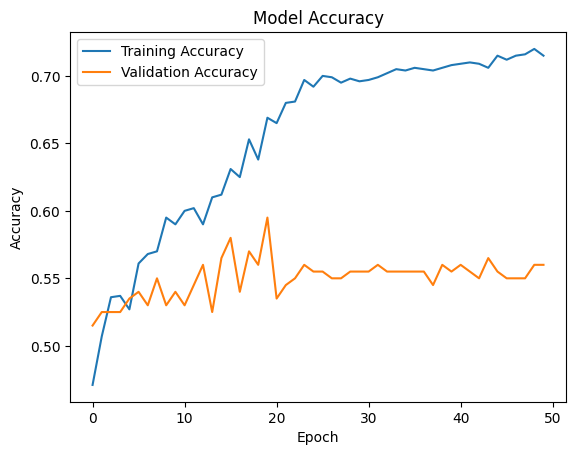

In [5]:
import matplotlib.pyplot as plt  # Import Matplotlib

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

      alpha      theta      beta     gamma   arousal  vigilance       tli  \
0  2.783487   7.391501  4.072571  1.553899  1.463118   2.498419  2.655483   
1  2.304374   2.429850  3.346171  1.065399  1.452096   1.414818  1.054451   
2  1.367211   2.477849  2.335188  1.675132  1.707993   1.646574  1.812338   
3  2.668605  10.695312  2.284412  1.321195  0.856032   5.850047  4.007829   
4  6.222411   6.934830  1.670090  0.898021  0.268399   7.878163  1.114493   

    neutral  cnsarousal     cpari  ...      varience         std          rms  \
0  0.550980    1.814947  0.400253  ...   7540.221907   86.834451  4330.819095   
1  1.377110    0.726158  0.706805  ...    512.989661   22.649275  4350.837831   
2  0.942425    1.061092  0.607322  ...    811.274543   28.482882  4360.517767   
3  0.213590    4.681867  0.170939  ...   6752.436061   82.173208  4356.596081   
4  0.240826    4.152369  0.126933  ...  29768.849155  172.536515  4352.886251   

       skew      kurt  mobility  complexity   peak

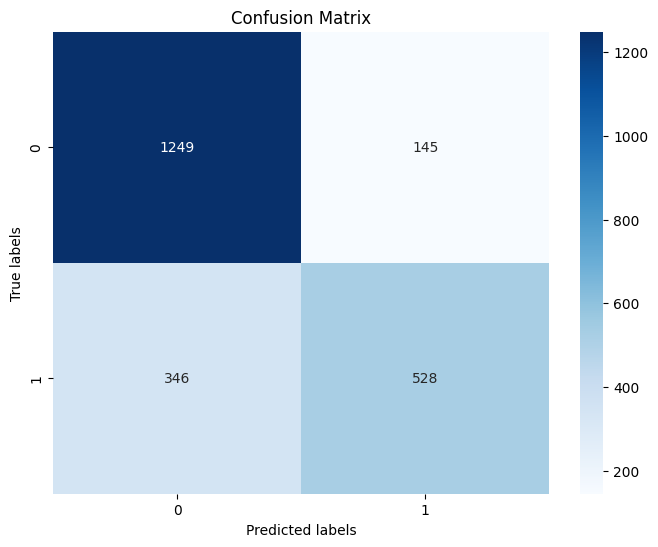

Model Accuracy: 0.78


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# ✅ Load dataset from Excel
file_path = r"C:\Users\kavin\OneDrive\Desktop\Final Project\bb\bb\F8_cleaned.xlsx"  # Your uploaded dataset
df = pd.read_excel(file_path)

# ✅ Check the first few rows to understand the dataset structure
print(df.head())

# ✅ Encode categorical labels (assuming 'RESPONSE' is the target variable)
label_encoder = LabelEncoder()
df['RESPONSE'] = label_encoder.fit_transform(df['RESPONSE'])

# ✅ Separate features (X) and target labels (y)
X = df.drop(columns=['RESPONSE'])  # Drop the target column
y = df['RESPONSE']

# ✅ Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Normalize features (important for models that rely on distance metrics)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Train a simple classification model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Make predictions
y_pred = model.predict(X_test)

# ✅ Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# ✅ Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

In [7]:

from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=[str(label) for label in label_encoder.classes_])

# Print classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84      1394
           1       0.78      0.60      0.68       874

    accuracy                           0.78      2268
   macro avg       0.78      0.75      0.76      2268
weighted avg       0.78      0.78      0.78      2268

